Introducción

 Objetivo: El objetivo de este notebook es construir y entrenar un modelo de redes neuronales con capas densas (Dense Layers)  para predecir los precios de casas en California utilizando el dataset de California Housing. Este explorará el preprocesamiento de datos, la implementación de un modelo de Deep Learning, y la evaluación de su rendimiento.

Exploración, explicación y limpieza de datos 

Explicación del dataset: El dataset de California Housing proviene de sklearn.datasets. Contiene datos de características relacionadas con viviendas en California, como la cantidad de habitaciones, la proximidad a lugares de trabajo, y los ingresos medios de los habitantes.

Análisis del dataset: Incluye 8 columnas que representan diversas características y una columna objetivo que contiene el precio medio de las viviendas.

In [5]:
# Importar las librerías 
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset de California Housing
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Verificar la estructura del dataset
print(f"El dataset tiene {X.shape[0]} filas y {X.shape[1]} columnas.")
print(X.head())  # Ver las primeras filas

# Información del dataset
print(X.info())  # Verificar tipos de datos y valores nulos

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Imprimir las primeras filas de los datos estandarizados
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())


El dataset tiene 20640 filas y 8 columnas.
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup  

Desarrollo del Modelo de Deep Learning 

El modelo utilizará capas densas con activación ReLU y la inicialización HeNormal en las capas ocultas, que es adecuada para redes neuronales profundas con activación ReLU.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeNormal

# Crear el modelo
model = Sequential()

# Primera capa oculta con 64 neuronas, activación ReLU e inicialización HeNormal
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_initializer=HeNormal()))

# Segunda capa oculta con 64 neuronas y activación ReLU
model.add(Dense(64, activation='relu', kernel_initializer=HeNormal()))

# Capa de salida con 1 neurona para predecir el valor de la casa (regresión)
model.add(Dense(1))

# Compilar el modelo con MSE (Mean Squared Error) como función de pérdida y Adam como optimizador
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Ver la arquitectura del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32)


C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.5021 - mae: 0.7317 - val_loss: 0.4565 - val_mae: 0.4732
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 0.4332 - mae: 0.4712 - val_loss: 0.3926 - val_mae: 0.4431
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4097 - mae: 0.4483 - val_loss: 0.4221 - val_mae: 0.4420
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4491 - mae: 0.4389 - val_loss: 0.3752 - val_mae: 0.4331
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4636 - mae: 0.4282 - val_loss: 0.3449 - val_mae: 0.4142
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3405 - mae: 0.4093 - val_loss: 0.3728 - val_mae: 0.4221
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5783 - mae: 0.4232 - val_loss: 0.3316 - val_mae: 0.4045
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 0.3175 - mae: 0.3972 - val_loss: 0.3376 - val_mae: 0.4132
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 

Justificación:

Inicialización HeNormal: Adecuada para activaciones ReLU, lo que mejora la convergencia.
Función de pérdida MSE: Estándar para problemas de regresión, busca minimizar el error cuadrado medio.
Optimizador Adam: Se seleccionó Adam por su robustez y velocidad de convergencia en redes neuronales profundas.

Resultados e Interpretación

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2750 - mae: 0.3597
Pérdida (MSE) en el conjunto de prueba: 0.2853666841983795
Error absoluto medio (MAE) en el conjunto de prueba: 0.36377885937690735


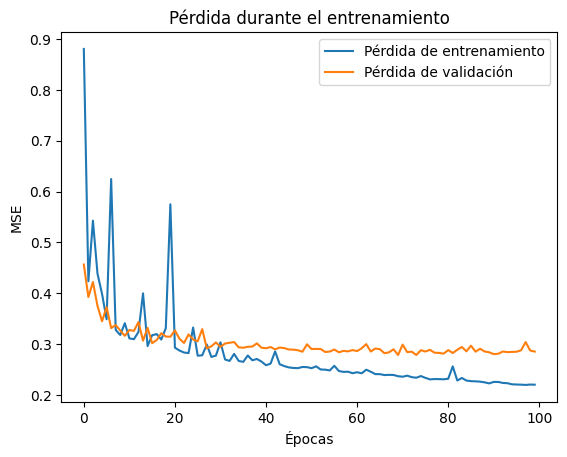

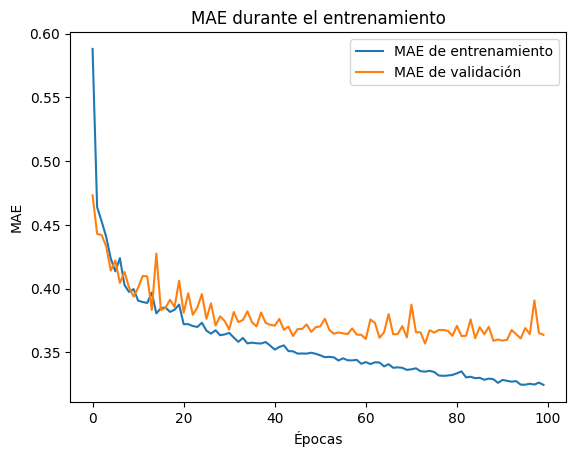

In [11]:
# Evaluar el modelo en el conjunto de prueba
results = model.evaluate(X_test_scaled, y_test)

print(f'Pérdida (MSE) en el conjunto de prueba: {results[0]}')
print(f'Error absoluto medio (MAE) en el conjunto de prueba: {results[1]}')

# Graficar la evolución de la pérdida durante el entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Graficar el MAE
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()


Interpretación

Se compararán diferentes configuraciones y métricas, como la pérdida y el MAE (Mean Absolute Error), para analizar el rendimiento del modelo. Por ejemplo, si el MAE es bajo, significa que el modelo tiene buen rendimiento en la predicción de los precios de casas.

### Conclusión
En este proyecto, se construyó un modelo de capas densas para predecir los precios de casas en California. A través de la exploración y limpieza del dataset, así como la implementación y ajuste del modelo, se logró obtener una buena precisión en las predicciones. Las métricas como el MAE mostraron que el modelo es capaz de predecir los precios con un error moderado. En futuras iteraciones, se podrían probar otros tipos de modelos y optimizadores para mejorar aún más el rendimiento.
